# Analysis of Nobel Laurets



### Content
+ Introduction: Nobel prize
+ Data description and objectives
+ Data preparation: cleaning and shaping
+ Data analysis and visualization 
+ Conclusion

## 1. Introduction: Nobel prize

Awarded for “the greatest benefit to humankind”

Between 1901 and 2019, the Nobel Prizes and the Prize in Economic Sciences were awarded 597 times to 950 people and organisations. The Nobel Prize is an international award administered by the Nobel Foundation in Stockholm, Sweden, and based on the fortune of Alfred Nobel, Swedish inventor and entrepreneur. In 1968, Sveriges Riksbank established The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel, founder of the Nobel Prize. Each prize consists of a medal, a personal diploma, and a cash award.

A person or organisation awarded the Nobel Prize is called Nobel Laureate. The word “laureate” refers to being signified by the laurel wreath. In ancient Greece, laurel wreaths were awarded to victors as a sign of honour.



source: https://www.nobelprize.org/prizes/

## 2. Data description and objectives

The Nobel Prize is given to the best minds on our planet.
It is not difficult to assume that the gender ratio of laureates as well as the ratio in different eras of the western and eastern parts of the world are different
And we will consider some aspects and visually analyze in detail the Nobel Prize, taking into account such aspects as gender, age, birth month, age, as well as university

Below is data that we will be used for our analysis:

+ born country code - country where **laureate** was born 
+ died country code -  country where **laureate** died
+ gender - sex of **laureate** 
+ year - when **laureate** get his prize
+ category - category of **laureate** prize
+ share - how many people received for this research besides **laureate**
+ name of university - **laureate**'s university where he/she stady or take some degree
+ country of university - country of university
+ born month - born month
+ age - how old **laureate** are now(2019)or when he died
+ age get prize - age of **laureate** when he get prize





#### 2.1 For analysis, we will consider issues such as:
1. Base Analysis (Country, gender, university)
2. Analysis of Migration and Imigration of Nobelers:
   + Geological
   + Gender
   + Year
3. Prize behavior during different Histroical eras* 
4. Analysis of different spheres's:
   + Geological
   + Migration/Imigration
5. Analysis of Age and Month of birth

 *Historical eras:

1. World War I (1914-1918) https://en.wikipedia.org/wiki/World_War_I
2. World War II (1939-1945) https://en.wikipedia.org/wiki/World_War_II
3. Cold War (1947-1991) https://en.wikipedia.org/wiki/Cold_War


## 3. Data preparation: cleaning and shaping



Before analyzing and visualizing the data, we must sort and divide them for the convenience of work as well as optimality

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('nobel_final.csv')
df.shape


(923, 14)

In [3]:
df

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,Peter,Handke,AT,NaN,male,2019,literature,1,NaN,NaN,NaN,Dec,78,77
919,Abiy,Ahmed Ali,ET,NaN,male,2019,peace,1,NaN,NaN,NaN,Aug,44,43
920,Abhijit,Banerjee,IN,NaN,male,2019,economics,3,Massachusetts Institute of Technology (MIT),Cambridge MA,USA,Feb,59,58
921,Esther,Duflo,FR,NaN,female,2019,economics,3,Massachusetts Institute of Technology (MIT),Cambridge MA,USA,Oct,48,47


### 3.1  Data preparation

How and into which sub-groups we will divide our dataset taken from https://www.kaggle.com/ 

To answer the question we posed, we must divide into such groups:
1. by immigration abd migration 
2. by hystorical eras
3. by spheres


#### 3.1.1 by immigration abd migration

in this pice of code we create Dictionary and List for Nobelers which imigrated to other countries

we create two dictionaries **imigrate_from** (numbers of imigrated Nobeler from Country) and **imigrate_to** (numbers of migrated Nobeler to Country)

and we create three Lists where we will save **imigrated Nobelers**  

In [4]:
imigrate_from = {}
imigrate_to = {}
imigrated_nobelers = []
imigrated_male_nobelers = []
imigrated_female_nobelers = [] #we create two dictionaries and three lists
for nobeler in df.iterrows(): #go over each nobelers
    
    born_country = nobeler[1]['born_country_code']
    died_country = nobeler[1]['died_country_code']
    if born_country != died_country and not pd.isna(died_country): #check each nobelers if he/she is not died or imigrated
        imigrated_nobelers.append(nobeler) # add all imigrated nobelers
        if nobeler[1]['gender'] == 'male': 
            imigrated_male_nobelers.append(nobeler) #if nobeler's gender is male add him to List
        if nobeler[1]['gender'] == 'female':
            imigrated_female_nobelers.append(nobeler) #if nobeler's gender is female add him to List
        if born_country in imigrate_from:
            imigrate_from[born_country] += 1 
        if born_country not in imigrate_from:
            imigrate_from[born_country] = 1 
        if died_country in imigrate_to:
            imigrate_to[died_country] += 1
        else:
            imigrate_to[died_country] = 1

In [5]:
imigrated_nobelers
#len(imigrated_male_nobelers)
#len(imigrated_female_nobelers)

[(5,
  firstname                  Marie
  surname                    Curie
  born_country_code             PL
  died_country_code             FR
  gender                    female
  year                        1903
  category                 physics
  share                          4
  name_of_university           NaN
  city_of_university           NaN
  country_of_university        NaN
  born_month                   Nov
  age                           67
  age_get_prize                 36
  Name: 5, dtype: object),
 (6,
  firstname                              Marie
  surname                                Curie
  born_country_code                         PL
  died_country_code                         FR
  gender                                female
  year                                    1911
  category                           chemistry
  share                                      1
  name_of_university       Sorbonne University
  city_of_university                     Paris
  c

#### 3.1.2 by hystorical eras

we create three Lists for each hictorical eras and add Nobeler get prize in one of this eras

In [6]:
worldw2 = []
worldw1 = []
coldw = []
for nobeler in df.iterrows():
    year = nobeler[1]['year']
    if year >= 1914 and year <= 1918: #if Nobelers get prize during 1914 and 1918, add him to World War 1 List
        worldw1.append(nobeler)
    elif year >= 1939 and year <= 1945: #if Nobelers get prize during 1939 and 1945, add him to World War 2 List
        worldw2.append(nobeler)
    elif year >= 1947 and year <= 1991: #if Nobelers get prize during 1941 and 1991, add him to Cold War List
        coldw.append(nobeler)

## 4. Data analysis and visualization

### 4.1 Base Analysis 


In [7]:
df = pd.read_csv('nobel_final.csv')
df.shape


(923, 14)

#### 4.1.1 Most Nobel Winner Countries


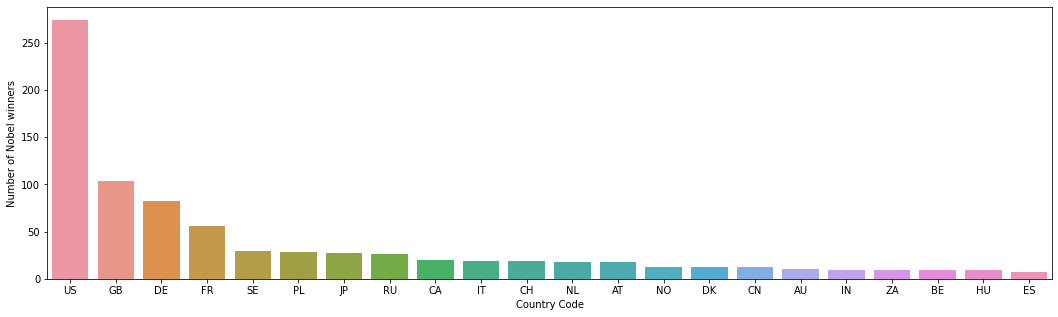

In [8]:
nobel_country = df['born_country_code'].value_counts().to_frame()
nobel_country = nobel_country[nobel_country['born_country_code'] >= 7]
plt.figure(figsize=(18, 5))
sns.barplot(x = nobel_country.index , y = 'born_country_code' ,data = nobel_country)
plt.xlabel('Country Code')
plt.ylabel('Number of Nobel winners')
plt.show()

**USA, Great British, Deutschland(Germany)** and **France** has most winners respectively 

#### 4.1.2 Top Universities with Nobel winers


In [9]:
nobel_university_winner = df['name_of_university'].value_counts().to_frame()
nobel_university_winner = nobel_university_winner[nobel_university_winner['name_of_university'] >= 7]


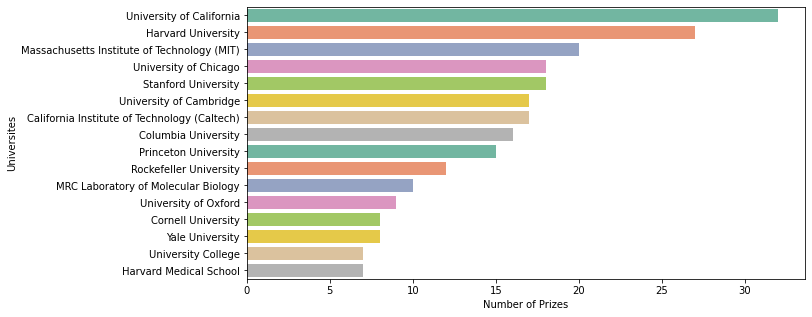

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(y = nobel_university_winner.index , x = 'name_of_university' ,data = nobel_university_winner ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Prizes')
plt.ylabel('Universites')
plt.show()

#### 4.1.3 Gender ratio for each sphere

In [11]:
gender_winner = df.groupby('category')['gender'].value_counts().to_frame()
gender_winner.columns = ['number of winners']
gender_winner.reset_index(inplace=True)

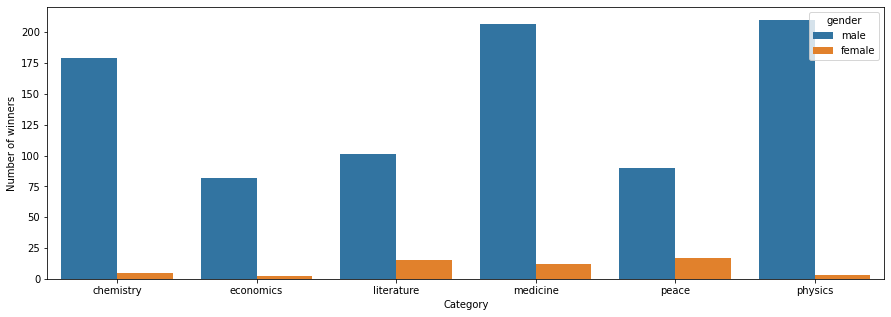

In [12]:
plt.figure(figsize=(15, 5))
sns.barplot(x = 'category' , y = 'number of winners' , hue = 'gender' ,data = gender_winner)
plt.xlabel('Category')
plt.ylabel('Number of winners')
plt.show()

The ratio of men and women is colossal in every area, however in category 'peace' ratio is less 

#### 4.2.1 Most Imigrated and Migrated Nobeler's country

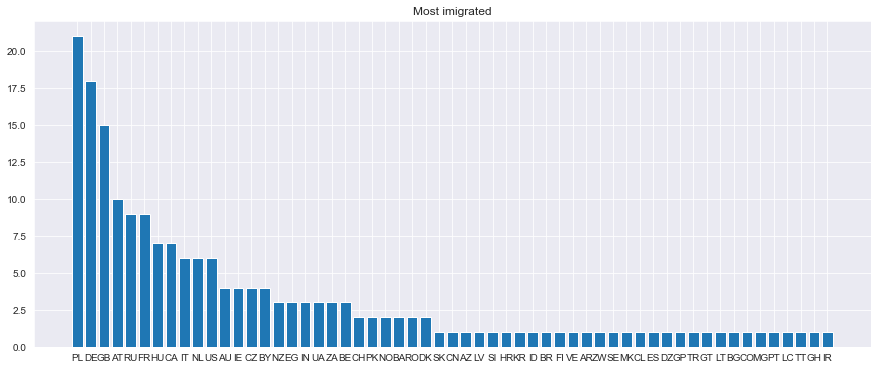

In [19]:
plt.rcParams["figure.figsize"] = [15,6]
vals = sorted(imigrate_from.items(), key=lambda x: x[1], reverse=True)
fig, ax = plt.subplots()
ax.bar(range(len(vals)), [t[1] for t in vals]  , align="center")
ax.set_xticks(range(len(vals)))
ax.set_xticklabels([t[0] for t in vals])
plt.title('Most imigrated')
plt.show()

we can see that most Nobelers imigrated from Poland, Germany and Great Britsh

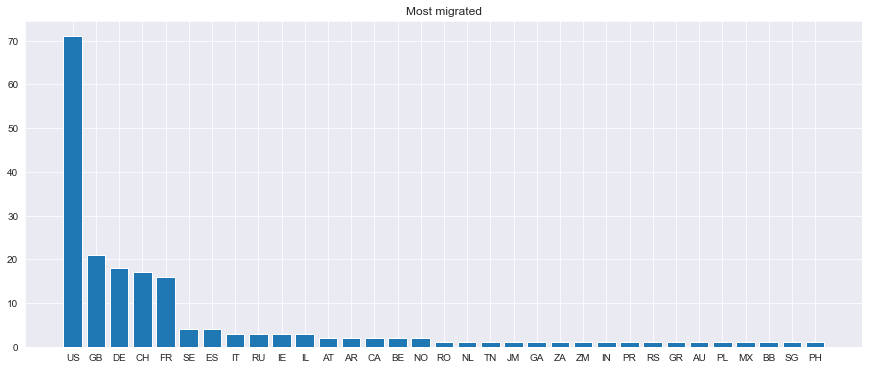

In [20]:
plt.rcParams["figure.figsize"] = [15,6]
vals = sorted(imigrate_to.items(), key=lambda x: x[1], reverse=True)
fig, ax = plt.subplots()
ax.bar(range(len(vals)), [t[1] for t in vals]  , align="center")
ax.set_xticks(range(len(vals)))
ax.set_xticklabels([t[0] for t in vals])
plt.title('Most migrated')
plt.show()

#### 4.3.1 Analysis of Age and Month of birth

In [15]:
print(str(df['age_get_prize'].mean()) + ' is average of age when get prize in all of Nobel winners from 1901 untill now.')

59.82340195016251 is average of age when get prize in all of Nobel winners from 1901 untill now.


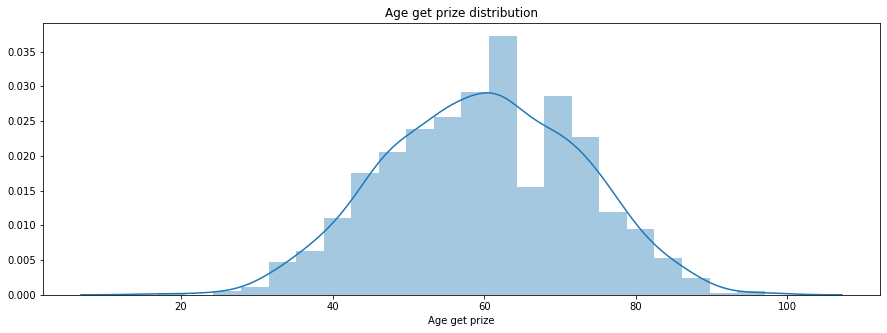

In [16]:
plt.figure(figsize=(15, 5))
sns.distplot(df['age_get_prize'])
plt.xlabel('Age get prize')
plt.title('Age get prize distribution')
plt.show()

We can see that most people get Nobel 60 year or near to Nobel

In [17]:
born_month_winner = df['born_month'].value_counts().to_frame()

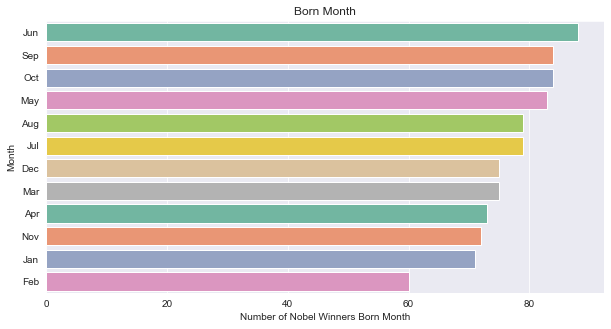

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
sns.barplot(y = born_month_winner.index , x = 'born_month' ,data = born_month_winner ,palette = sns.color_palette('Set2'))
plt.xlabel('Number of Nobel Winners Born Month')
plt.ylabel('Month')
plt.title('Born Month')


plt.show()

We can see that most Nobelers get prizes was born in June,September,October